In [29]:
import os 
import sys
import matplotlib.pyplot as plt


repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', ))
sys.path.append(repo_root)

from src import *
from src.models.BradleyTerry import *
from tst.tst_weight_conversion.old_newman import * 

In [10]:
def compute_predicted_ratings_HO_BT_info(training_set, pi_values): 
    bond_matrix = create_hypergraph_from_data_weight(training_set)
    predicted_ho_scores, iter = synch_solve_equations(bond_matrix, 10000, pi_values, iterate_equation_newman_weighted, sens=1e-6)
    return predicted_ho_scores, iter

In [30]:
def synch_solve_equations_info(bond_matrix, max_iter, pi_values, method, sens=1e-10):
    scores = {n: 1.0 for n in pi_values}
    normalize_scores_old(scores)

    info = {}
    err = 1.0
    iteration = 0
    while iteration < max_iter and err > sens:
        
        err = 0.0
        tmp_scores = {}


        for s in scores:
            tmp_scores[s] = method(s, scores, bond_matrix)

                 
        normalize_scores_old(tmp_scores)

        for s in tmp_scores:
            if abs(tmp_scores[s]-scores[s]) > err:
                err = abs(tmp_scores[s]-scores[s])
            scores[s] = tmp_scores[s]
                
        # print(err)
        iteration += 1
        info[iteration] = err

   
    return scores, iteration


def compute_predicted_ratings_HO_BT_info_random(training_set, pi_values, max_iter=1000): 
    # Using un-weighted newman iterative schema such that a random shuffle of the data can occur 
    bond_matrix = create_hypergraph_from_data_old(training_set)
    predicted_ho_scores, info  = synch_solve_equations_info(bond_matrix, max_iter, pi_values, iterate_equation_newman_old, sens=1e-6)
 
    return predicted_ho_scores, info

In [35]:
values = {}
K_values = [2, 3, 4, 5, 6, 7, 8, 10]
for K in K_values:

    for rep in range(100):
        data, pi_values = generate_weighted_model_instance(100, 100, K , K)
        predicted_scores, iter = compute_predicted_ratings_HO_BT_info(data, pi_values)

        # data, pi_values = generate_model_instance(100, 100, K , K)
        # predicted_scores, iter = compute_predicted_ratings_HO_BT_info_random(data, pi_values)

        if K in values:
            values[K].append(iter)
        else:
            values[K] = [iter]
    

99
124
103
89
135
72
103
111
92
96
112
144
149
114
110
99
135
132
168
94
130
84
91
88
130
82
93
151
103
141
119
108
94
116
109
94
83
102
91
78
105
119
81
96
94
93
119
123
106
88
102
104
120
76
111
151
128
119
118
141
96
133
132
110
107
93
136
96
65
138
209
92
140
102
148
72
123
103
95
112
112
126
107
124
105
107
99
77
153
83
81
116


KeyboardInterrupt: 

In [33]:
avg = {k: np.mean(v) for k,v in values.items()} 

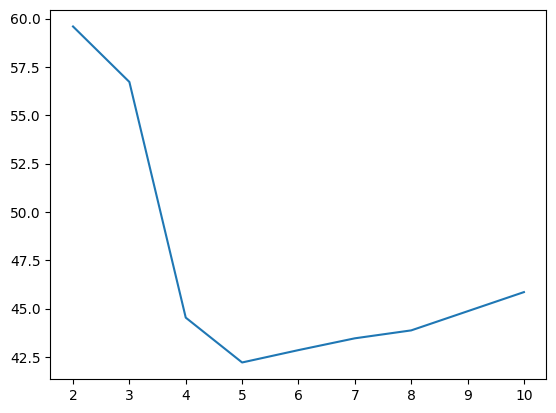

In [34]:
plt.plot(list(avg.keys()), list(avg.values()))